In [1]:
from hydra import compose, initialize
import pandas as pd
import omegaconf
import torch

from data.perm_seq_mnist import get_dataloaders
from utils.run_utils import configure_reproducibility

In [2]:
initialize(config_path="../conf/local", job_name="debug_dl")
cfg = compose(config_name="test_model_mnist")

In [3]:
rng = configure_reproducibility(cfg.run.seed)

In [4]:
_, valid_dl = get_dataloaders(cfg, rng)

In [5]:
print(omegaconf.OmegaConf.to_yaml(cfg))

run:
  device: cpu
  loglevel: INFO
  project_path: /media/shift97/MyPassport/Flavio/repos/seq-mnist
  codename: default_local
  seed: 2147483647
  wandb_mode: disabled
data:
  num_train: 10000
  num_test: 10000
  permute: false
train:
  batch_size: 4
  perc_valid: 0.1
model:
  name: dntm
  n_locations: 1000
  content_size: 8
  address_size: 8
  controller_input_size: 1
  controller_output_size: 10
  controller_hidden_state_size: 100
  ckpt: ${run.project_path}/models/checkpoints/dntm_trained_smnist_18-05-22.pth



In [10]:
all_labels=torch.tensor([])
for batch, labels in valid_dl:
    all_labels = torch.cat([all_labels, labels]

In [11]:
all_labels[:100]

tensor([0., 5., 7., 5., 4., 9., 6., 4., 2., 7., 0., 0., 8., 9., 7., 3., 5., 8.,
        2., 3., 5., 6., 7., 9., 1., 7., 6., 7., 8., 4., 2., 1., 5., 1., 9., 2.,
        5., 1., 2., 3., 9., 7., 4., 3., 1., 9., 5., 1., 1., 3., 4., 1., 2., 1.,
        8., 5., 2., 4., 8., 4., 7., 1., 6., 5., 3., 2., 6., 6., 5., 6., 9., 8.,
        8., 8., 7., 4., 5., 4., 3., 2., 6., 6., 9., 6., 7., 9., 7., 2., 9., 3.,
        7., 3., 8., 3., 4., 7., 4., 2., 6., 1.])

In [7]:
all_labels[:100]

tensor([5., 4., 6., 7., 6., 6., 0., 4., 1., 9., 0., 0., 7., 7., 1., 7., 7., 7.,
        7., 9., 9., 9., 0., 3., 3., 2., 8., 8., 0., 4., 2., 3., 2., 1., 4., 4.,
        3., 5., 6., 1., 2., 1., 9., 4., 9., 9., 5., 0., 9., 0., 9., 8., 1., 2.,
        5., 1., 4., 4., 4., 4., 4., 1., 6., 7., 4., 1., 2., 0., 5., 3., 2., 1.,
        0., 1., 7., 5., 4., 7., 7., 1., 8., 0., 6., 7., 0., 4., 8., 4., 6., 4.,
        5., 6., 8., 3., 9., 9., 1., 7., 2., 5.])

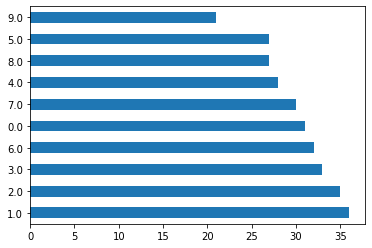

In [19]:
_ = pd.Series(all_labels.cpu().numpy()).value_counts().plot.barh()